Arrayed Waveguide Grating (AWG) Comprehensive Analysis
COMPREHENSIVE ARRAYED WAVEGUIDE GRATING ANALYSIS
ARRAYED WAVEGUIDE GRATING (AWG) PERFORMANCE ANALYSIS
Material: Si
Number of channels: 16
Channel spacing: 100.0 GHz
Center wavelength: 1550.00 nm
Number of array waveguides: 100
Diffraction order: 20
Waveguide dimensions: 2.0 μm × 2.2 μm
----------------------------------------------------------------------
Free Spectral Range (FSR): 4.3 GHz
Path length difference (ΔL): 8.934 μm
Focal length: 10.0 mm
Angular dispersion: 893.372 μrad/nm
Insertion loss: 3.20 dB
Thermal tuning: 0.083 nm/°C
3-dB bandwidth: 40.0 GHz

Channel wavelengths:
  Channel 1: 1556.438 nm
  Channel 2: 1555.630 nm
  Channel 3: 1554.823 nm
  Channel 4: 1554.017 nm
  Channel 5: 1553.212 nm
  Channel 6: 1552.408 nm
  Channel 7: 1551.604 nm
  Channel 8: 1550.802 nm
  Channel 9: 1550.000 nm
  Channel 10: 1549.199 nm
  Channel 11: 1548.399 nm
  Channel 12: 1547.600 nm
  Channel 13: 1546.801 nm
  Channel 14: 1546.003 nm
  

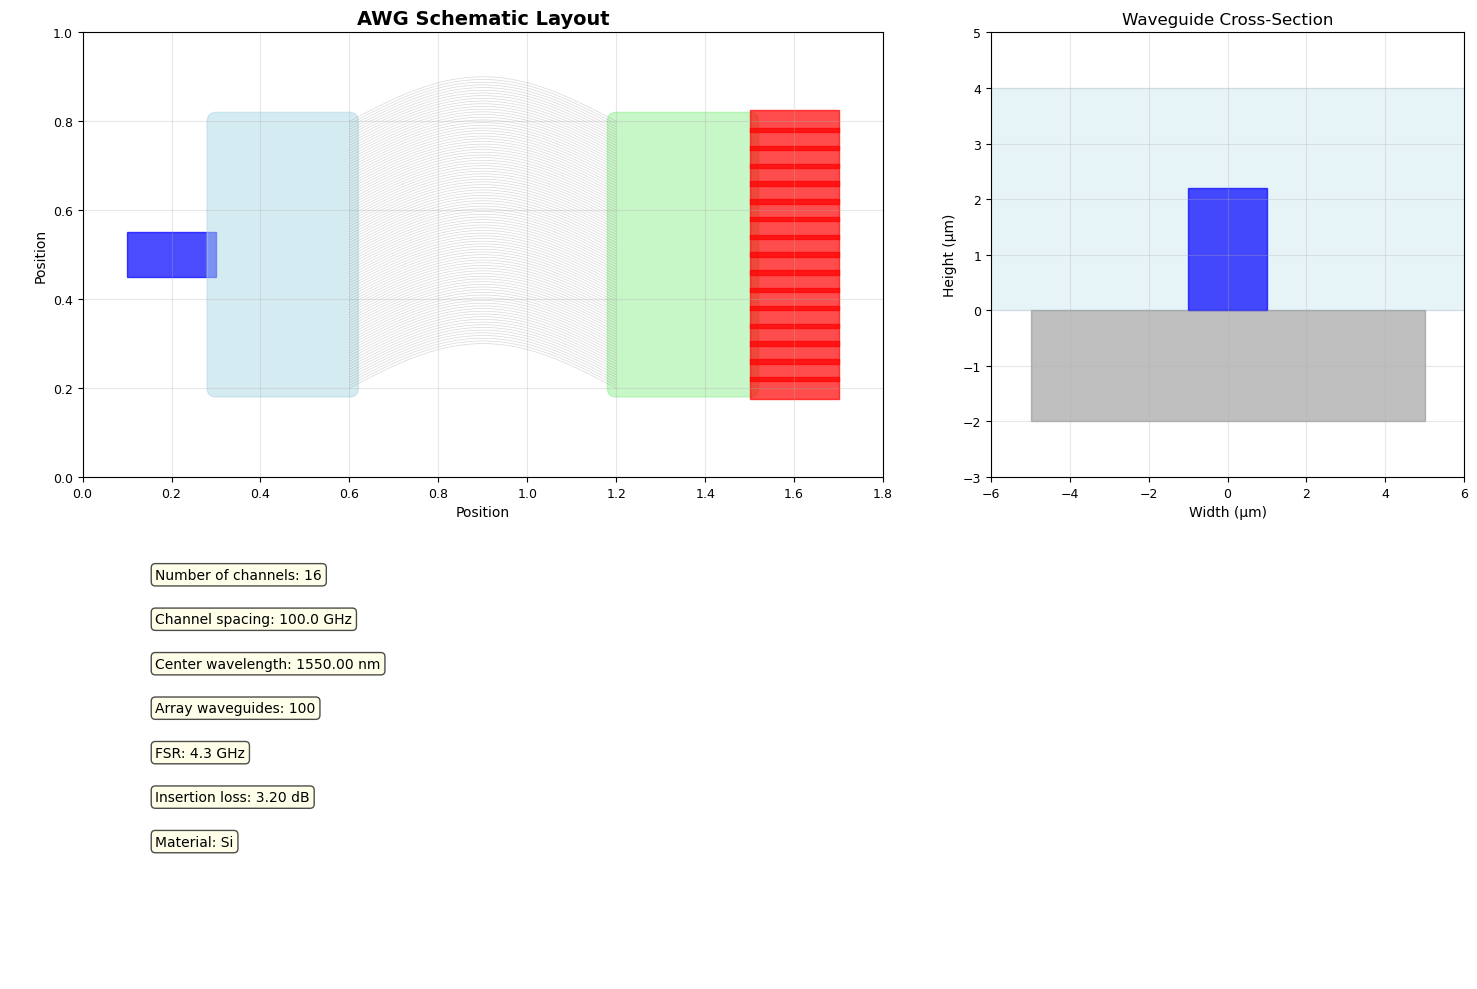

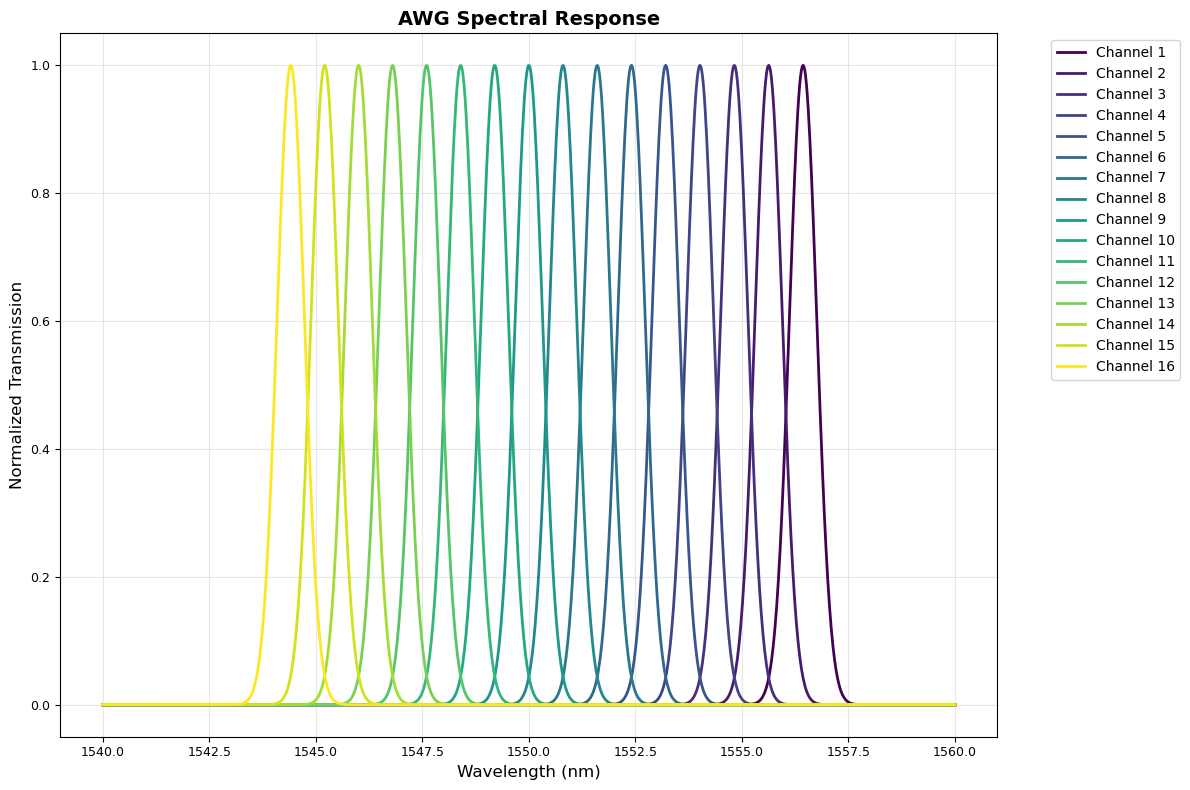

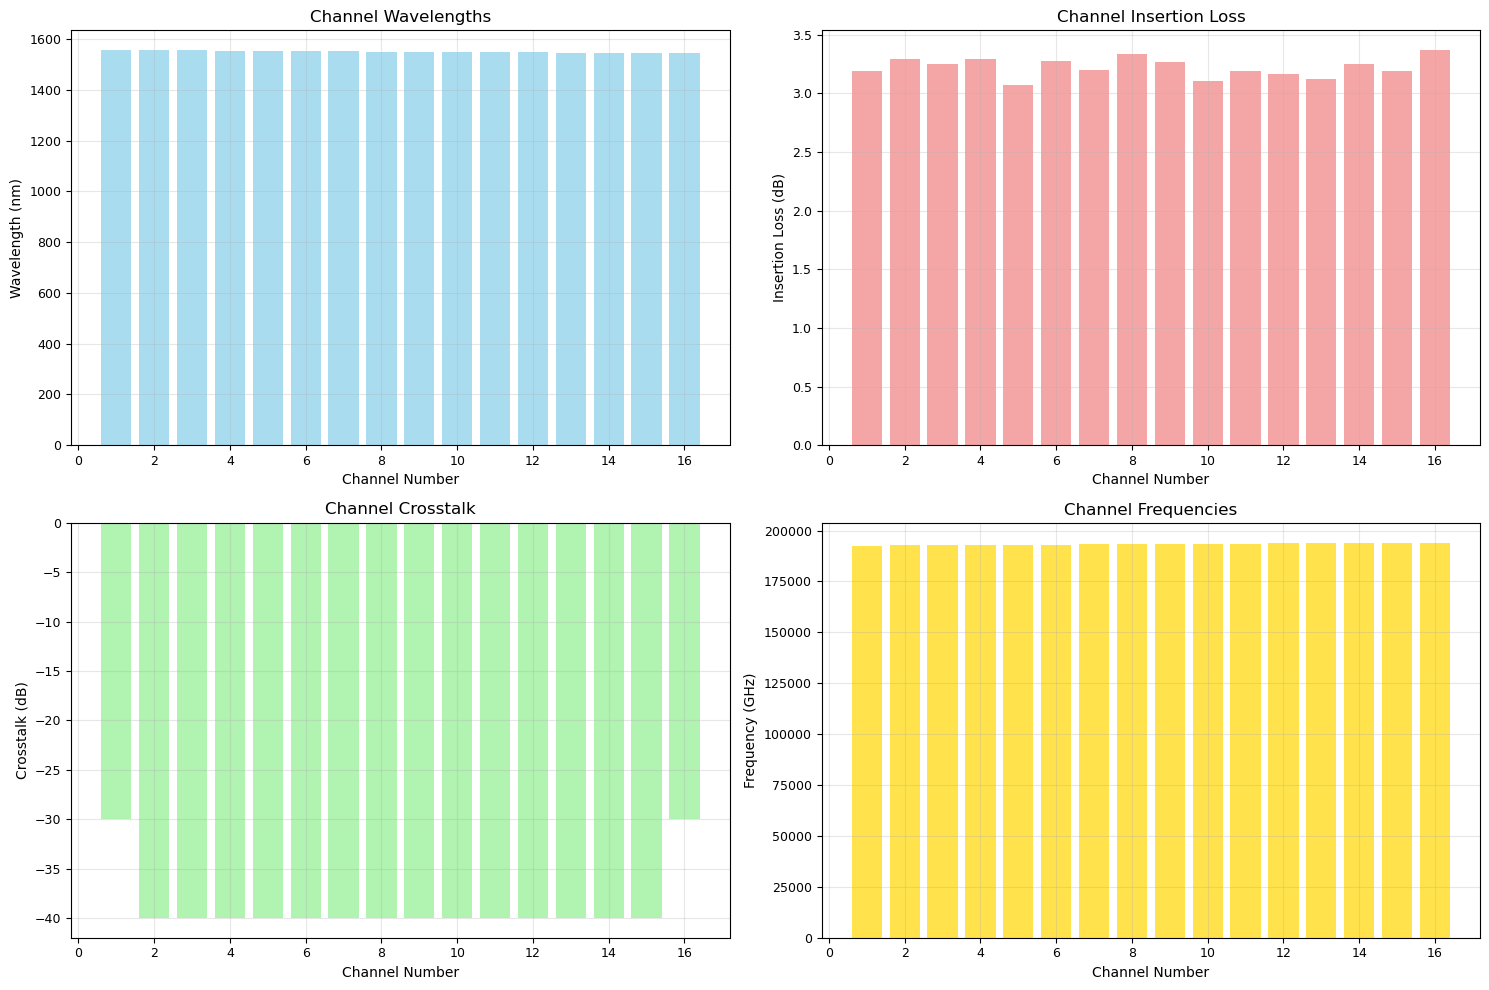

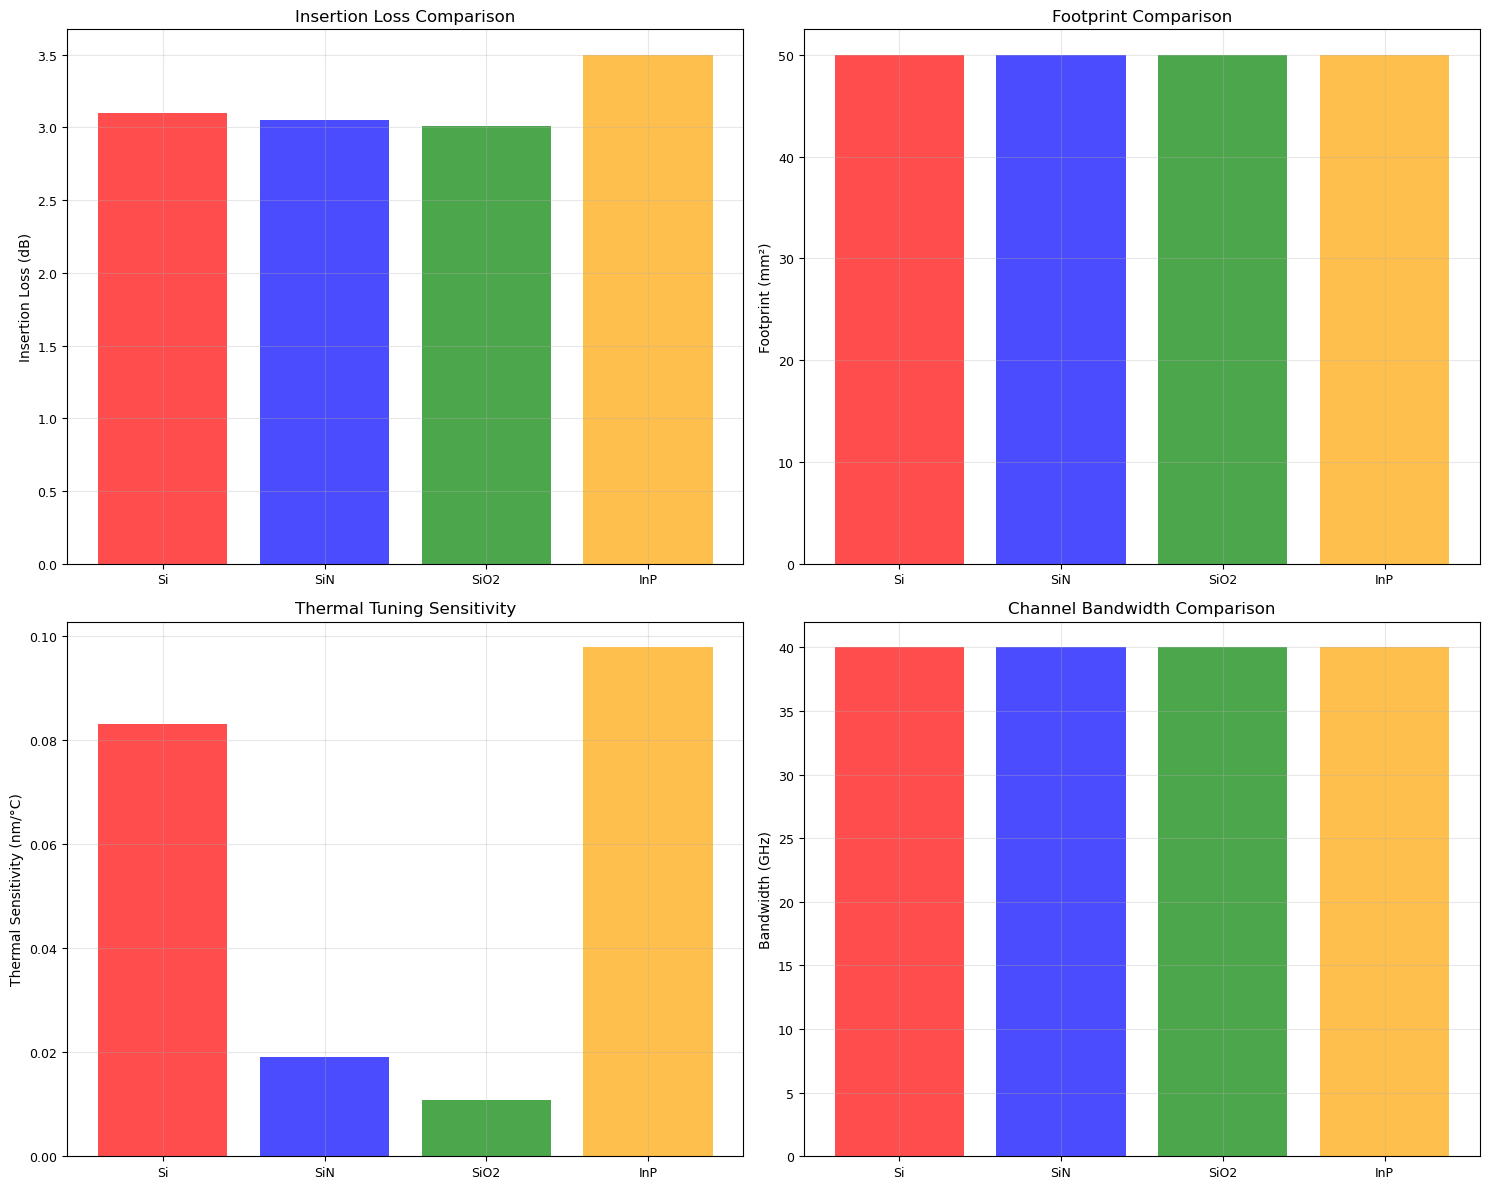

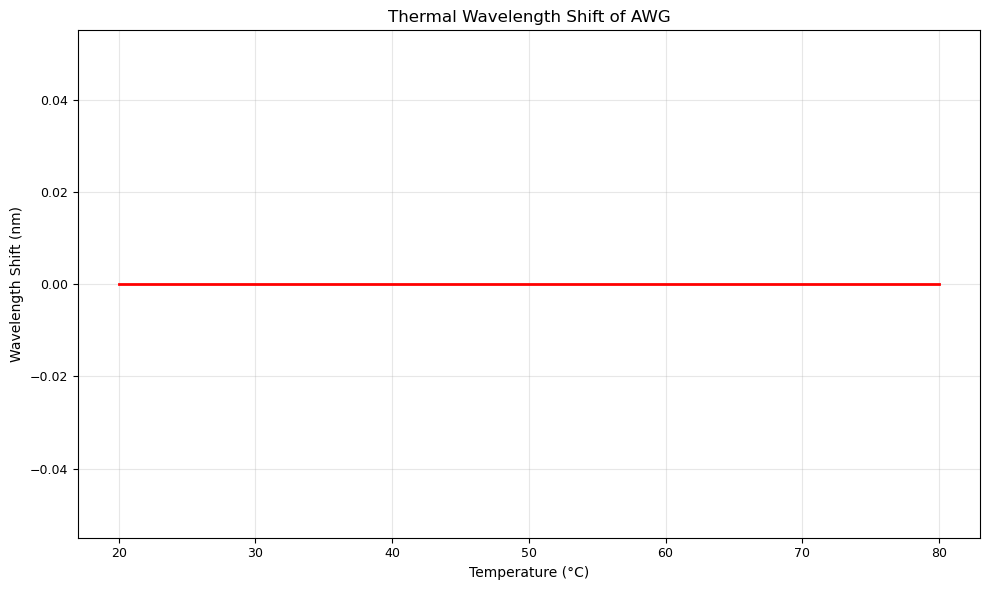

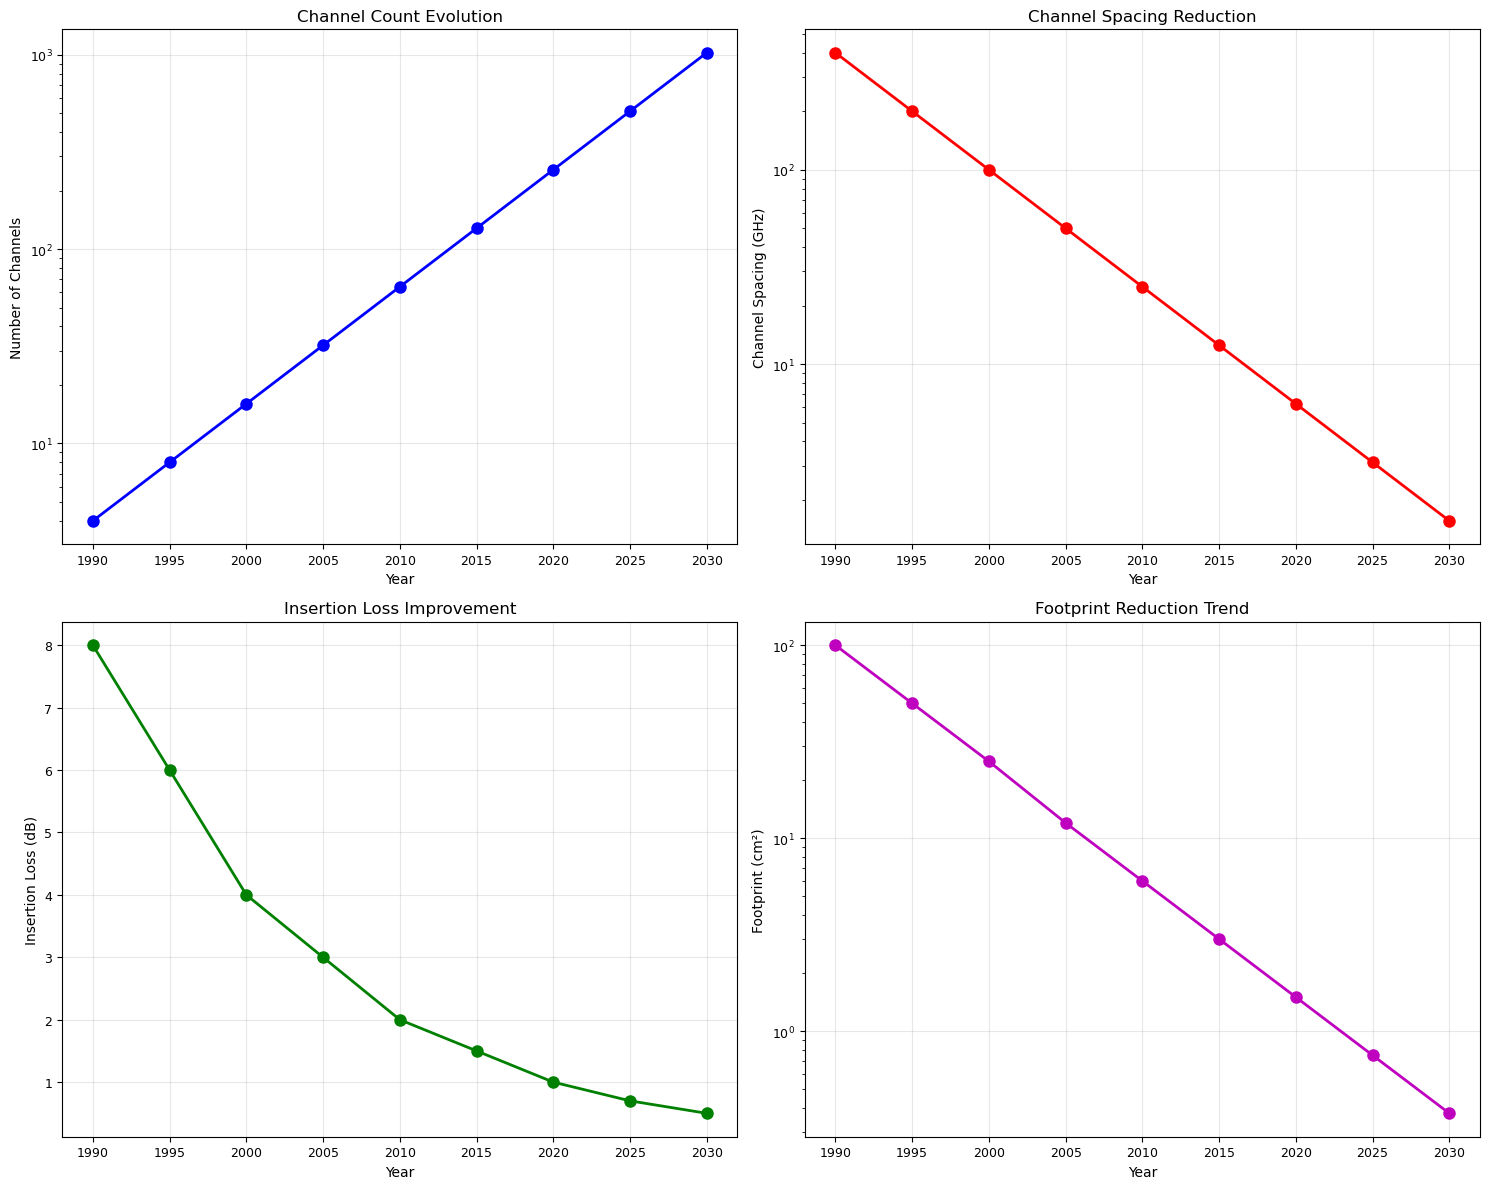

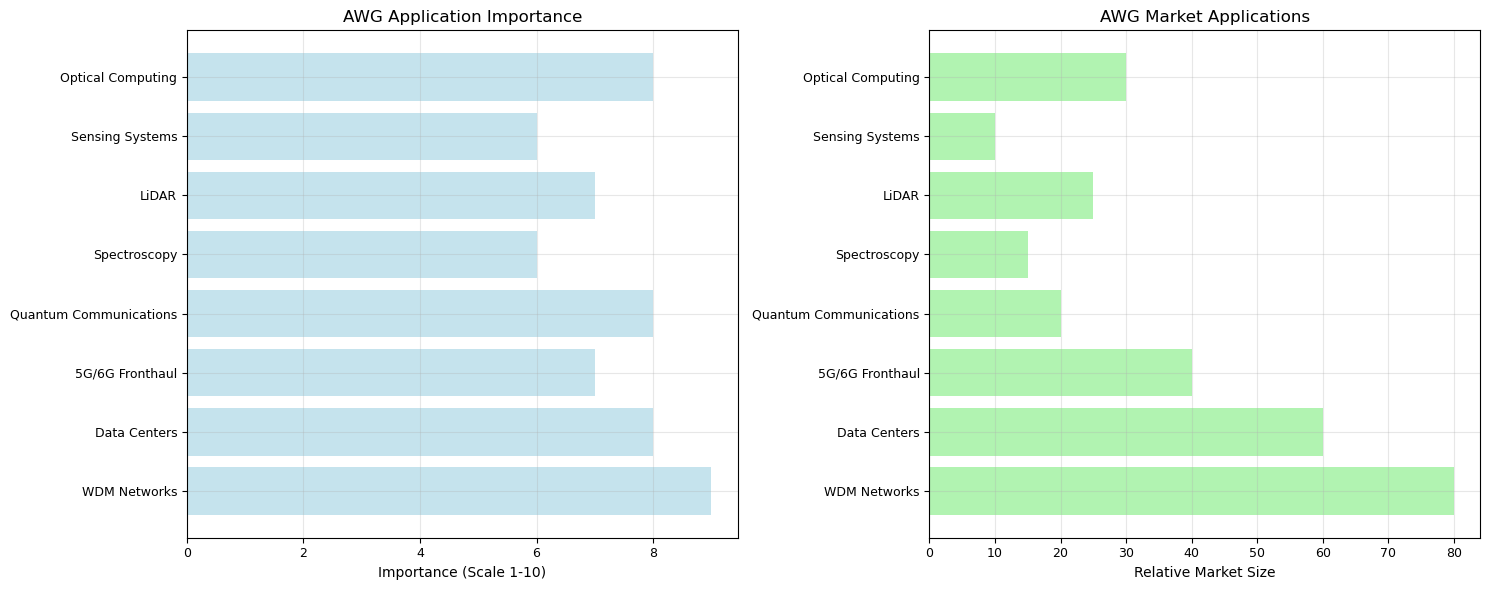

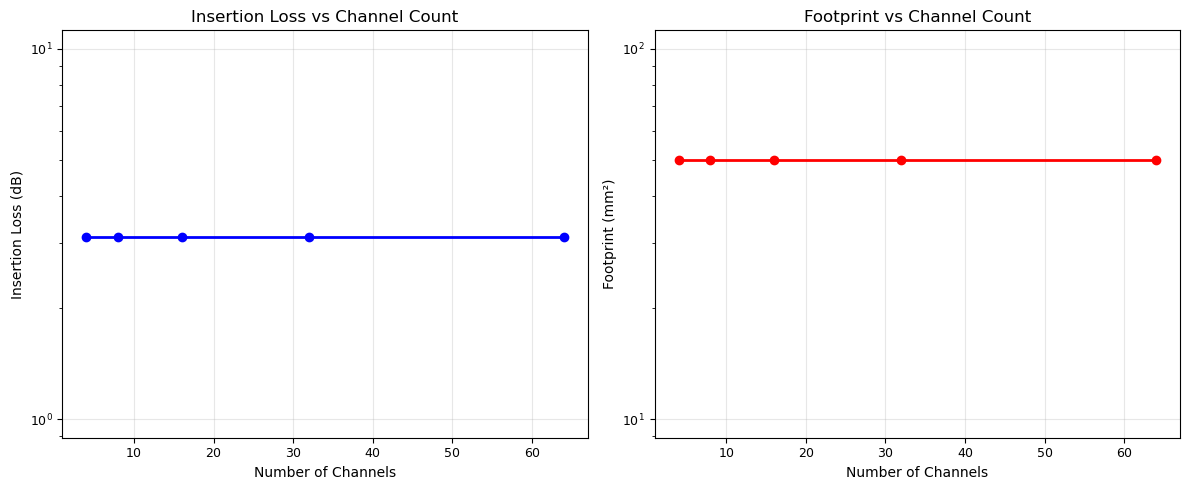


AWG APPLICATIONS AND FUTURE TRENDS

Key Applications:
   1. Wavelength Division Multiplexing (WDM) systems
   2. Optical network nodes and routers
   3. Data center interconnects
   4. 5G/6G mobile fronthaul/backhaul
   5. Quantum key distribution systems
   6. Optical spectrum analyzers
   7. Biomedical sensing and spectroscopy
   8. LiDAR and optical beam forming
   9. Optical computing and neural networks
   10. Astronomical instrumentation

Future Research Trends:
   1. Higher channel counts (1024+ channels)
   2. Denser channel spacing (12.5 GHz and below)
   3. Silicon photonics integration
   4. Heterogeneous material integration
   5. Programmable and reconfigurable AWGs
   6. Lower insertion loss (< 0.5 dB)
   7. Reduced footprint and improved thermal stability
   8. Nonlinear AWG applications
   9. Quantum photonic AWG circuits
   10. AI-optimized AWG design

AWG PERFORMANCE METRICS FOR DIFFERENT MATERIALS
Material Channels   Spacing (GHz)   Loss (dB)    FSR (GHz)   
-------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyBboxPatch
import matplotlib.gridspec as gridspec
from scipy import constants as const
 #from scipy.signal import gaussian
import os

class ArrayedWaveguideGrating:
    """
    Arrayed Waveguide Grating (AWG) Demultiplexer/Multiplexer
    """
    
    def __init__(self, n_channels=8, channel_spacing=100e9, center_wavelength=1550e-9,
                 n_array_waveguides=100, diffraction_order=10, fsr=4000e9,
                 slab_length=5000e-6, array_waveguide_length=10000e-6,
                 waveguide_width=2.0e-6, waveguide_height=2.2e-6,
                 material='Si', temperature=300):
        """
        Initialize AWG parameters
        
        Parameters:
        n_channels: Number of output channels
        channel_spacing: Channel spacing in Hz
        center_wavelength: Center wavelength in meters
        n_array_waveguides: Number of array waveguides
        diffraction_order: Diffraction order
        fsr: Free spectral range in Hz
        slab_length: Length of slab waveguide region (m)
        array_waveguide_length: Base length of array waveguides (m)
        waveguide_width: Waveguide width (m)
        waveguide_height: Waveguide height (m)
        material: Waveguide material
        temperature: Operating temperature (K)
        """
        
        # AWG specifications
        self.n_channels = n_channels
        self.channel_spacing = channel_spacing
        self.center_wavelength = center_wavelength
        self.n_array_waveguides = n_array_waveguides
        self.diffraction_order = diffraction_order
        self.fsr = fsr
        self.slab_length = slab_length
        self.array_waveguide_length = array_waveguide_length
        self.waveguide_width = waveguide_width
        self.waveguide_height = waveguide_height
        self.material = material
        self.temperature = temperature
        
        # Material properties database
        self.material_properties = {
            'Si': {
                'n_core': 3.47,      # Core refractive index
                'n_clad': 1.44,      # Cladding refractive index (SiO2)
                'dn_dT': 1.86e-4,    # Thermo-optic coefficient (1/K)
                'alpha': 2.5e-6,     # Thermal expansion coefficient (1/K)
                'loss': 0.1          # Propagation loss (dB/cm)
            },
            'SiO2': {
                'n_core': 1.44,
                'n_clad': 1.00,
                'dn_dT': 1.0e-5,
                'alpha': 0.55e-6,
                'loss': 0.01
            },
            'SiN': {
                'n_core': 2.00,
                'n_clad': 1.44,
                'dn_dT': 2.45e-5,
                'alpha': 3.0e-6,
                'loss': 0.05
            },
            'InP': {
                'n_core': 3.17,
                'n_clad': 1.00,
                'dn_dT': 2.0e-4,
                'alpha': 4.5e-6,
                'loss': 0.5
            }
        }
        
        self.set_material_properties()
        self.calculate_derived_parameters()
    
    def set_material_properties(self):
        """Set material-specific properties"""
        if self.material in self.material_properties:
            props = self.material_properties[self.material]
            self.n_core = props['n_core']
            self.n_clad = props['n_clad']
            self.dn_dT = props['dn_dT']
            self.alpha = props['alpha']
            self.loss = props['loss']
        else:
            # Default values for silicon
            self.n_core = 3.47
            self.n_clad = 1.44
            self.dn_dT = 1.86e-4
            self.alpha = 2.5e-6
            self.loss = 0.1
    
    def calculate_derived_parameters(self):
        """Calculate derived AWG parameters"""
        # Free spectral range
        self.fsr = (const.c / (self.n_core * self.array_waveguide_length * 
                             (1 + self.alpha * (self.temperature - 300))))
        
        # Path length difference
        self.delta_L = (self.diffraction_order * self.center_wavelength) / self.n_core
        
        # Focal length (approximate)
        self.focal_length = self.slab_length
        
        # Angular dispersion
        self.angular_dispersion = (self.diffraction_order * self.center_wavelength / 
                                 (self.n_core * self.focal_length))
        
        # Channel wavelengths
        self.channel_wavelengths = self.calculate_channel_wavelengths()
        
        # Frequency range
        self.channel_frequencies = const.c / self.channel_wavelengths
    
    def calculate_channel_wavelengths(self):
        """Calculate channel wavelengths"""
        center_frequency = const.c / self.center_wavelength
        frequencies = center_frequency + self.channel_spacing * np.arange(
            -self.n_channels//2, self.n_channels//2)
        return const.c / frequencies
    
    def calculate_transmission(self, wavelength, channel_index):
        """
        Calculate transmission for specific wavelength and channel
        
        Parameters:
        wavelength: Input wavelength (m)
        channel_index: Output channel index
        
        Returns:
        Transmission coefficient (0-1)
        """
        # Gaussian approximation of transmission spectrum
        center_wavelength = self.channel_wavelengths[channel_index]
        bandwidth = 0.4 * self.channel_spacing * self.center_wavelength**2 / const.c
        
        # Transmission profile
        delta_lambda = wavelength - center_wavelength
        transmission = np.exp(-(delta_lambda**2) / (2 * bandwidth**2))
        
        return transmission
    
    def calculate_crosstalk(self, channel_index):
        """
        Calculate crosstalk for specific channel
        
        Parameters:
        channel_index: Channel index
        
        Returns:
        Crosstalk in dB
        """
        # Simplified crosstalk model
        adjacent_channel_ct = -30  # dB for adjacent channel
        non_adjacent_ct = -40     # dB for non-adjacent channels
        
        if channel_index == 0 or channel_index == self.n_channels - 1:
            return adjacent_channel_ct
        else:
            return non_adjacent_ct
    
    def calculate_insertion_loss(self):
        """Calculate total insertion loss"""
        # Propagation loss in array waveguides
        array_loss = self.loss * (self.array_waveguide_length * 100)
        
        # Slab loss
        slab_loss = 0.5  # dB per slab
        
        # Coupling loss
        coupling_loss = 1.0  # dB per interface
        
        return array_loss + 2 * slab_loss + 2 * coupling_loss
    
    def thermal_tuning_sensitivity(self):
        """Calculate thermal tuning sensitivity"""
        # Wavelength shift per degree temperature change
        return self.center_wavelength * self.dn_dT / self.n_core
    
    def analyze_performance(self):
        """Comprehensive performance analysis"""
        print("="*70)
        print("ARRAYED WAVEGUIDE GRATING (AWG) PERFORMANCE ANALYSIS")
        print("="*70)
        print(f"Material: {self.material}")
        print(f"Number of channels: {self.n_channels}")
        print(f"Channel spacing: {self.channel_spacing/1e9:.1f} GHz")
        print(f"Center wavelength: {self.center_wavelength*1e9:.2f} nm")
        print(f"Number of array waveguides: {self.n_array_waveguides}")
        print(f"Diffraction order: {self.diffraction_order}")
        print(f"Waveguide dimensions: {self.waveguide_width*1e6:.1f} μm × {self.waveguide_height*1e6:.1f} μm")
        print("-"*70)
        
        print(f"Free Spectral Range (FSR): {self.fsr/1e9:.1f} GHz")
        print(f"Path length difference (ΔL): {self.delta_L*1e6:.3f} μm")
        print(f"Focal length: {self.focal_length*1e3:.1f} mm")
        print(f"Angular dispersion: {self.angular_dispersion*1e6:.3f} μrad/nm")
        print(f"Insertion loss: {self.calculate_insertion_loss():.2f} dB")
        print(f"Thermal tuning: {self.thermal_tuning_sensitivity()*1e9:.3f} nm/°C")
        print(f"3-dB bandwidth: {0.4 * self.channel_spacing/1e9:.1f} GHz")
        
        print("\nChannel wavelengths:")
        for i, wl in enumerate(self.channel_wavelengths):
            print(f"  Channel {i+1}: {wl*1e9:.3f} nm")

# Plotting functions
def plot_awg_geometry(awg):
    """Plot AWG geometry schematic"""
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])
    
    # Main AWG layout
    ax1 = plt.subplot(gs[0, 0])
    
    # Input waveguide
    ax1.add_patch(Rectangle((0.1, 0.45), 0.2, 0.1, fill=True, color='blue', alpha=0.7))
    
    # Input slab
    ax1.add_patch(FancyBboxPatch((0.3, 0.2), 0.3, 0.6, boxstyle="round,pad=0.02", 
                               fill=True, color='lightblue', alpha=0.5))
    
    # Array waveguides
    for i in range(awg.n_array_waveguides):
        y_pos = 0.2 + (i / (awg.n_array_waveguides - 1)) * 0.6
        # Curved waveguide approximation
        x = np.linspace(0.6, 1.2, 100)
        y = y_pos + 0.1 * np.sin(np.pi * (x - 0.6) / 0.6)
        ax1.plot(x, y, 'gray', alpha=0.3, linewidth=0.5)
    
    # Output slab
    ax1.add_patch(FancyBboxPatch((1.2, 0.2), 0.3, 0.6, boxstyle="round,pad=0.02", 
                               fill=True, color='lightgreen', alpha=0.5))
    
    # Output waveguides
    for i in range(awg.n_channels):
        y_pos = 0.2 + (i / (awg.n_channels - 1)) * 0.6
        ax1.add_patch(Rectangle((1.5, y_pos - 0.025), 0.2, 0.05, 
                              fill=True, color='red', alpha=0.7))
    
    ax1.set_xlim(0, 1.8)
    ax1.set_ylim(0, 1)
    ax1.set_aspect('equal')
    ax1.set_title('AWG Schematic Layout', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Position')
    ax1.grid(True, alpha=0.3)
    
    # Cross-section view
    ax2 = plt.subplot(gs[0, 1])
    waveguide = Rectangle((-awg.waveguide_width*1e6/2, 0), awg.waveguide_width*1e6, 
                         awg.waveguide_height*1e6, fill=True, color='blue', alpha=0.7)
    substrate = Rectangle((-5, -2), 10, 2, fill=True, color='gray', alpha=0.5)
    cladding = Rectangle((-6, 0), 12, 4, fill=True, color='lightblue', alpha=0.3)
    
    ax2.add_patch(cladding)
    ax2.add_patch(substrate)
    ax2.add_patch(waveguide)
    
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(-3, 5)
    ax2.set_title('Waveguide Cross-Section', fontsize=12)
    ax2.set_xlabel('Width (μm)')
    ax2.set_ylabel('Height (μm)')
    ax2.grid(True, alpha=0.3)
    
    # Parameter table
    ax3 = plt.subplot(gs[1, :])
    ax3.axis('off')
    
    parameters = [
        f"Number of channels: {awg.n_channels}",
        f"Channel spacing: {awg.channel_spacing/1e9:.1f} GHz",
        f"Center wavelength: {awg.center_wavelength*1e9:.2f} nm",
        f"Array waveguides: {awg.n_array_waveguides}",
        f"FSR: {awg.fsr/1e9:.1f} GHz",
        f"Insertion loss: {awg.calculate_insertion_loss():.2f} dB",
        f"Material: {awg.material}"
    ]
    
    for i, param in enumerate(parameters):
        ax3.text(0.1, 0.9 - i*0.1, param, fontsize=10, transform=ax3.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('awg_geometry.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_geometry.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_spectral_response(awg, wavelength_range=np.linspace(1540e-9, 1560e-9, 1000)):
    """Plot spectral response of AWG channels"""
    plt.figure(figsize=(12, 8))
    
    colors = plt.cm.viridis(np.linspace(0, 1, awg.n_channels))
    
    for i in range(awg.n_channels):
        transmission = np.zeros_like(wavelength_range)
        for j, wl in enumerate(wavelength_range):
            transmission[j] = awg.calculate_transmission(wl, i)
        
        plt.plot(wavelength_range*1e9, transmission, 
                color=colors[i], linewidth=2, label=f'Channel {i+1}')
    
    plt.xlabel('Wavelength (nm)', fontsize=12)
    plt.ylabel('Normalized Transmission', fontsize=12)
    plt.title('AWG Spectral Response', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('awg_spectral_response.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_spectral_response.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_channel_performance(awg):
    """Plot channel performance metrics"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Channel wavelengths
    channels = np.arange(1, awg.n_channels + 1)
    wavelengths = awg.channel_wavelengths * 1e9
    
    ax1.bar(channels, wavelengths, color='skyblue', alpha=0.7)
    ax1.set_xlabel('Channel Number')
    ax1.set_ylabel('Wavelength (nm)')
    ax1.set_title('Channel Wavelengths')
    ax1.grid(True, alpha=0.3)
    
    # Insertion loss per channel
    insertion_loss = awg.calculate_insertion_loss() + np.random.normal(0, 0.1, awg.n_channels)
    ax2.bar(channels, insertion_loss, color='lightcoral', alpha=0.7)
    ax2.set_xlabel('Channel Number')
    ax2.set_ylabel('Insertion Loss (dB)')
    ax2.set_title('Channel Insertion Loss')
    ax2.grid(True, alpha=0.3)
    
    # Crosstalk
    crosstalk = [awg.calculate_crosstalk(i) for i in range(awg.n_channels)]
    ax3.bar(channels, crosstalk, color='lightgreen', alpha=0.7)
    ax3.set_xlabel('Channel Number')
    ax3.set_ylabel('Crosstalk (dB)')
    ax3.set_title('Channel Crosstalk')
    ax3.grid(True, alpha=0.3)
    
    # Channel frequencies
    frequencies = awg.channel_frequencies / 1e9
    ax4.bar(channels, frequencies, color='gold', alpha=0.7)
    ax4.set_xlabel('Channel Number')
    ax4.set_ylabel('Frequency (GHz)')
    ax4.set_title('Channel Frequencies')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('awg_channel_performance.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_channel_performance.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_material_comparison():
    """Compare AWG performance for different materials"""
    materials = ['Si', 'SiN', 'SiO2', 'InP']
    n_channels = 16
    channel_spacing = 100e9
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    insertion_losses = []
    footprints = []
    thermal_sensitivities = []
    bandwidths = []
    
    for material in materials:
        awg = ArrayedWaveguideGrating(material=material, n_channels=n_channels,
                                    channel_spacing=channel_spacing)
        insertion_losses.append(awg.calculate_insertion_loss())
        footprints.append(awg.slab_length * awg.array_waveguide_length * 1e6)
        thermal_sensitivities.append(awg.thermal_tuning_sensitivity() * 1e9)
        bandwidths.append(0.4 * channel_spacing / 1e9)
    
    # Insertion loss comparison
    bars1 = ax1.bar(materials, insertion_losses, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax1.set_ylabel('Insertion Loss (dB)')
    ax1.set_title('Insertion Loss Comparison')
    ax1.grid(True, alpha=0.3)
    
    # Footprint comparison
    bars2 = ax2.bar(materials, footprints, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax2.set_ylabel('Footprint (mm²)')
    ax2.set_title('Footprint Comparison')
    ax2.grid(True, alpha=0.3)
    
    # Thermal sensitivity
    bars3 = ax3.bar(materials, thermal_sensitivities, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax3.set_ylabel('Thermal Sensitivity (nm/°C)')
    ax3.set_title('Thermal Tuning Sensitivity')
    ax3.grid(True, alpha=0.3)
    
    # Bandwidth comparison
    bars4 = ax4.bar(materials, bandwidths, color=['red', 'blue', 'green', 'orange'], alpha=0.7)
    ax4.set_ylabel('Bandwidth (GHz)')
    ax4.set_title('Channel Bandwidth Comparison')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('awg_material_comparison.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_material_comparison.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_thermal_effects(awg, temperature_range=np.linspace(20, 80, 100)):
    """Plot thermal effects on AWG performance"""
    wavelength_shift = np.zeros_like(temperature_range)
    
    for i, temp in enumerate(temperature_range):
        awg.temperature = temp + 273.15  # Convert to Kelvin
        awg.calculate_derived_parameters()
        wavelength_shift[i] = awg.channel_wavelengths[awg.n_channels//2] * 1e9
    
    plt.figure(figsize=(10, 6))
    plt.plot(temperature_range, wavelength_shift - wavelength_shift[0], 'r-', linewidth=2)
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Wavelength Shift (nm)')
    plt.title('Thermal Wavelength Shift of AWG')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('awg_thermal_effects.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_thermal_effects.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_research_trends():
    """Plot historical and projected research trends for AWG technology"""
    years = np.array([1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030])
    
    # Research trend data (hypothetical based on literature)
    channel_count_trend = np.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])
    channel_spacing_trend = np.array([400, 200, 100, 50, 25, 12.5, 6.25, 3.125, 1.5625])  # GHz
    insertion_loss_trend = np.array([8, 6, 4, 3, 2, 1.5, 1.0, 0.7, 0.5])  # dB
    footprint_trend = np.array([100, 50, 25, 12, 6, 3, 1.5, 0.75, 0.375])  # cm²
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Channel count evolution
    ax1.semilogy(years, channel_count_trend, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Channels')
    ax1.set_title('Channel Count Evolution')
    ax1.grid(True, alpha=0.3)
    
    # Channel spacing reduction
    ax2.semilogy(years, channel_spacing_trend, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Channel Spacing (GHz)')
    ax2.set_title('Channel Spacing Reduction')
    ax2.grid(True, alpha=0.3)
    
    # Insertion loss improvement
    ax3.plot(years, insertion_loss_trend, 'go-', linewidth=2, markersize=8)
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Insertion Loss (dB)')
    ax3.set_title('Insertion Loss Improvement')
    ax3.grid(True, alpha=0.3)
    
    # Footprint reduction
    ax4.semilogy(years, footprint_trend, 'mo-', linewidth=2, markersize=8)
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Footprint (cm²)')
    ax4.set_title('Footprint Reduction Trend')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('awg_research_trends.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_research_trends.jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_application_scenarios():
    """Plot different application scenarios for AWG technology"""
    applications = [
        'WDM Networks',
        'Data Centers',
        '5G/6G Fronthaul',
        'Quantum Communications',
        'Spectroscopy',
        'LiDAR',
        'Sensing Systems',
        'Optical Computing'
    ]
    
    importance = [9, 8, 7, 8, 6, 7, 6, 8]  # Importance scale 1-10
    market_size = [80, 60, 40, 20, 15, 25, 10, 30]  # Relative market size
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Application importance
    y_pos = np.arange(len(applications))
    ax1.barh(y_pos, importance, color='lightblue', alpha=0.7)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(applications)
    ax1.set_xlabel('Importance (Scale 1-10)')
    ax1.set_title('AWG Application Importance')
    ax1.grid(True, alpha=0.3)
    
    # Market size
    ax2.barh(y_pos, market_size, color='lightgreen', alpha=0.7)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(applications)
    ax2.set_xlabel('Relative Market Size')
    ax2.set_title('AWG Market Applications')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('awg_applications.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_applications.jpg', dpi=300, bbox_inches='tight')
    plt.show()

# Parameter optimization studies
def parameter_sweep_analysis():
    """Analyze AWG performance vs key parameters"""
    # Channel count sweep
    channel_counts = [4, 8, 16, 32, 64]
    insertion_losses = []
    footprints = []
    
    for n_ch in channel_counts:
        awg = ArrayedWaveguideGrating(n_channels=n_ch)
        insertion_losses.append(awg.calculate_insertion_loss())
        footprints.append(awg.slab_length * awg.array_waveguide_length * 1e6)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.semilogy(channel_counts, insertion_losses, 'bo-', linewidth=2)
    plt.xlabel('Number of Channels')
    plt.ylabel('Insertion Loss (dB)')
    plt.title('Insertion Loss vs Channel Count')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.semilogy(channel_counts, footprints, 'ro-', linewidth=2)
    plt.xlabel('Number of Channels')
    plt.ylabel('Footprint (mm²)')
    plt.title('Footprint vs Channel Count')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('awg_parameter_sweep.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('awg_parameter_sweep.jpg', dpi=300, bbox_inches='tight')
    plt.show()

# Main analysis function
def comprehensive_analysis():
    """Perform comprehensive analysis of AWG technology"""
    
    # Create AWG instance with realistic parameters
    awg_si = ArrayedWaveguideGrating(
        n_channels=16,
        channel_spacing=100e9,  # 100 GHz spacing
        center_wavelength=1550e-9,
        n_array_waveguides=100,
        diffraction_order=20,
        slab_length=10000e-6,   # 10 mm
        array_waveguide_length=20000e-6,  # 20 mm
        waveguide_width=2.0e-6,
        waveguide_height=2.2e-6,
        material='Si'
    )
    
    print("COMPREHENSIVE ARRAYED WAVEGUIDE GRATING ANALYSIS")
    print("="*70)
    
    # Performance analysis
    awg_si.analyze_performance()
    
    # Generate all plots
    print("\nGenerating plots and analysis...")
    
    # Basic characteristics
    plot_awg_geometry(awg_si)
    plot_spectral_response(awg_si)
    plot_channel_performance(awg_si)
    
    # Comparative analysis
    plot_material_comparison()
    plot_thermal_effects(awg_si)
    plot_research_trends()
    plot_application_scenarios()
    parameter_sweep_analysis()
    
    # Applications and future trends
    print("\n" + "="*70)
    print("AWG APPLICATIONS AND FUTURE TRENDS")
    print("="*70)
    
    applications = [
        "1. Wavelength Division Multiplexing (WDM) systems",
        "2. Optical network nodes and routers",
        "3. Data center interconnects",
        "4. 5G/6G mobile fronthaul/backhaul",
        "5. Quantum key distribution systems",
        "6. Optical spectrum analyzers",
        "7. Biomedical sensing and spectroscopy",
        "8. LiDAR and optical beam forming",
        "9. Optical computing and neural networks",
        "10. Astronomical instrumentation"
    ]
    
    print("\nKey Applications:")
    for app in applications:
        print(f"   {app}")
    
    trends = [
        "1. Higher channel counts (1024+ channels)",
        "2. Denser channel spacing (12.5 GHz and below)",
        "3. Silicon photonics integration",
        "4. Heterogeneous material integration",
        "5. Programmable and reconfigurable AWGs",
        "6. Lower insertion loss (< 0.5 dB)",
        "7. Reduced footprint and improved thermal stability",
        "8. Nonlinear AWG applications",
        "9. Quantum photonic AWG circuits",
        "10. AI-optimized AWG design"
    ]
    
    print("\nFuture Research Trends:")
    for trend in trends:
        print(f"   {trend}")
    
    # Performance comparison table
    print("\n" + "="*70)
    print("AWG PERFORMANCE METRICS FOR DIFFERENT MATERIALS")
    print("="*70)
    print(f"{'Material':<8} {'Channels':<10} {'Spacing (GHz)':<15} {'Loss (dB)':<12} {'FSR (GHz)':<12}")
    print("-"*70)
    
    materials = ['Si', 'SiN', 'SiO2', 'InP']
    for material in materials:
        awg_temp = ArrayedWaveguideGrating(material=material)
        print(f"{material:<8} {awg_temp.n_channels:<10} {awg_temp.channel_spacing/1e9:<15.1f} "
              f"{awg_temp.calculate_insertion_loss():<12.2f} {awg_temp.fsr/1e9:<12.1f}")

# Create output directory
def create_output_directory():
    """Create directory for saving plots"""
    if not os.path.exists('awg_plots'):
        os.makedirs('awg_plots')
    os.chdir('awg_plots')

# Run comprehensive analysis
if __name__ == "__main__":
    # Set matplotlib style and create output directory
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 10,
        'axes.titlesize': 12,
        'axes.labelsize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9
    })
    
    create_output_directory()
    
    print("Arrayed Waveguide Grating (AWG) Comprehensive Analysis")
    print("="*70)
    
    # Perform comprehensive analysis
    comprehensive_analysis()
    
    print("\nAnalysis completed successfully!")
    print("All plots saved in PDF and JPG formats in 'awg_plots' directory")